In [342]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
from sklearn.metrics import mean_squared_error



pd.set_option('max_columns', 50)
plt.style.use('bmh')

In [368]:
train = pd.read_csv("sales_train_validation_afcs2020.csv")
prices = pd.read_csv("sell_prices_afcs2020.csv")
calender = pd.read_csv("calendar_afcs2020.csv")
sample = pd.read_csv("sample_submission_afcs2020.csv")
evaluation = pd.read_csv("sales_train_evaluation_afcs2020.csv")


In [185]:
d_cols = [c for c in train if 'd_' in c]

In [369]:
train



,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_2_001_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_2_002_CA_3_validation,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,HOBBIES_2_003_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,3
3,HOBBIES_2_004_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0,1,0,0,2,1,1,0,0,0,0,0,0,0,0,0
4,HOBBIES_2_005_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,HOBBIES_2_145_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,...,0,3,1,0,0,0,0,0,5,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
145,HOBBIES_2_146_CA_3_validation,0,2,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0
146,HOBBIES_2_147_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
147,HOBBIES_2_148_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,1,1,1,0,0,0,0,0,0,0


In [188]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_3,HOBBIES_2_001,11105,5.47
1,CA_3,HOBBIES_2_001,11106,5.47
2,CA_3,HOBBIES_2_001,11107,5.47
3,CA_3,HOBBIES_2_001,11108,5.47
4,CA_3,HOBBIES_2_001,11109,5.47


In [355]:
sample.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_2_001_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_2_002_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_2_003_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_2_004_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_2_005_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


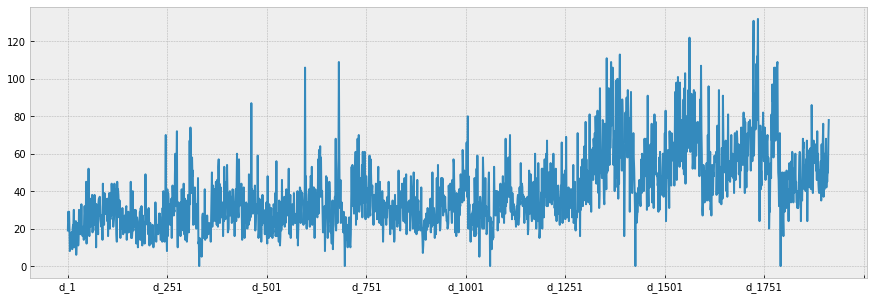

In [232]:
train.set_index('id').sum().plot(figsize=(15, 5))

In [360]:
train[train["id"]=="HOBBIES_2_001_CA_3_validation"].iloc[:,6:].T.reset_index().copy()

,index,0
0,d_6,0
1,d_7,0
2,d_8,0
3,d_9,0
4,d_10,0
...,...,...
1903,d_1909,0
1904,d_1910,0
1905,d_1911,0
1906,d_1912,0


In [267]:
summedSales = pd.DataFrame(train.set_index('id').sum()).reset_index()

In [268]:
datetime = calender[["date","d"]]

In [269]:
merged = pd.merge(left=summedSales,right=datetime,left_on="index",right_on="d",how="left")

In [271]:
merged["date"] = pd.to_datetime(merged["date"])

In [311]:
merged2 = merged.copy()

In [312]:
merged2 = merged2.drop(["d","index"],axis=1)

In [302]:
merged3 = merged2.rename({"date":"ds",0:"y"},axis=1)

In [314]:
ts = merged3.copy()

In [331]:
train = ts.iloc[:-28,:].copy()
validation = ts.iloc[-28:,:].copy()

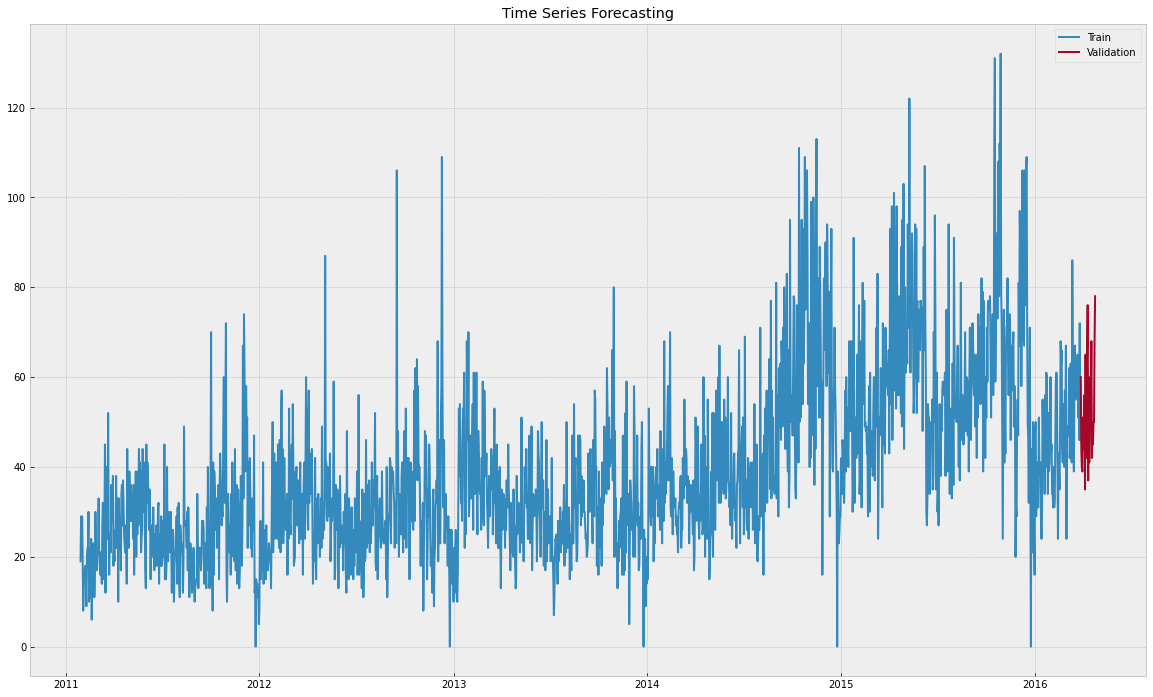

In [328]:
plt.figure(figsize=(20,12))
plt.plot(train["ds"],train["y"],label="Train")
plt.plot(validation["ds"],validation["y"],label="Validation")
plt.title("Time Series Forecasting")
plt.legend()

In [344]:
## Naive algorithm
predictions = []
for i in range(28):
    predictions.append(train.iloc[-1,0])
    # add test data to train
    train = train.append(test.iloc[i])

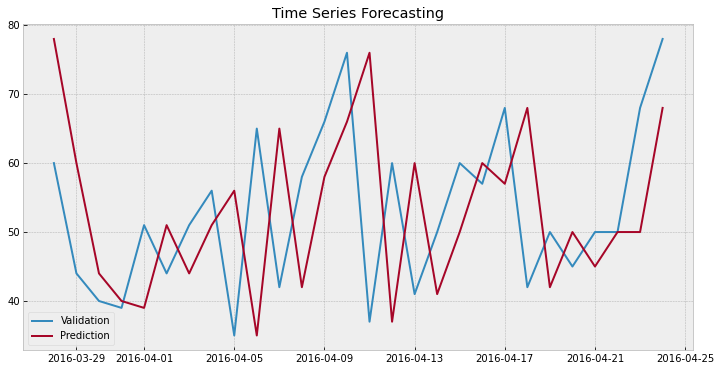

In [346]:
plt.figure(figsize=(12,6))
plt.plot(validation["ds"],validation["y"],label="Validation")
plt.plot(validation["ds"],predictions,label="Prediction")

plt.title("Time Series Forecasting")
plt.legend()

In [343]:
#RMSE of naive algorithm
rmse =  np.sqrt(mean_squared_error(predictions,test["y"]))
print("RMSE:",rmse)

RMSE: 15.768413272833039


In [353]:
#Prophet

from fbprophet import Prophet
model = Prophet()
model.fit(train)
future = model.make_future_dataframe(28,include_history=False)
predictionProphet = model.predict(future)
predictionProphet = predictionProphet[["yhat","yhat_lower","yhat_upper"]]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_2_001_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_2_002_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_2_003_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_2_004_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_2_005_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,HOBBIES_2_145_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145,HOBBIES_2_146_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
146,HOBBIES_2_147_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
147,HOBBIES_2_148_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


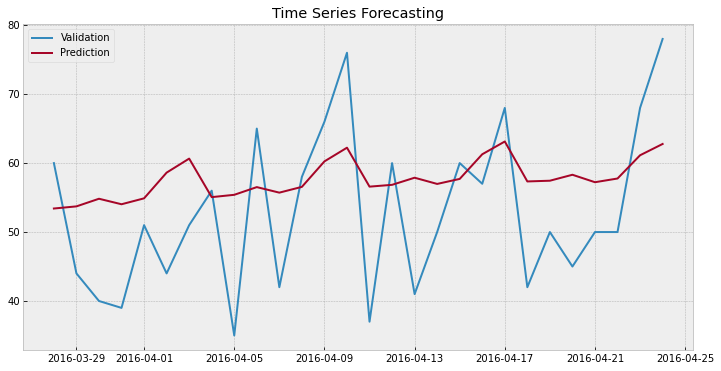

In [385]:
plt.figure(figsize=(12,6))
plt.plot(validation["ds"],validation["y"],label="Validation")
plt.plot(validation["ds"],predictionProphet["yhat"],label="Prediction")

plt.title("Time Series Forecasting")
plt.legend()

In [387]:
rmse =  np.sqrt(mean_squared_error(predictionProphet["yhat"],test["y"]))
print("RMSE:",rmse)

RMSE: 11.085464008269692


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_2_001_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_2_002_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_2_003_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_2_004_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_2_005_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,HOBBIES_2_145_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145,HOBBIES_2_146_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
146,HOBBIES_2_147_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
147,HOBBIES_2_148_CA_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
